C:\Program Files\Miniconda3\lib\site-packages\matplotlib\colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


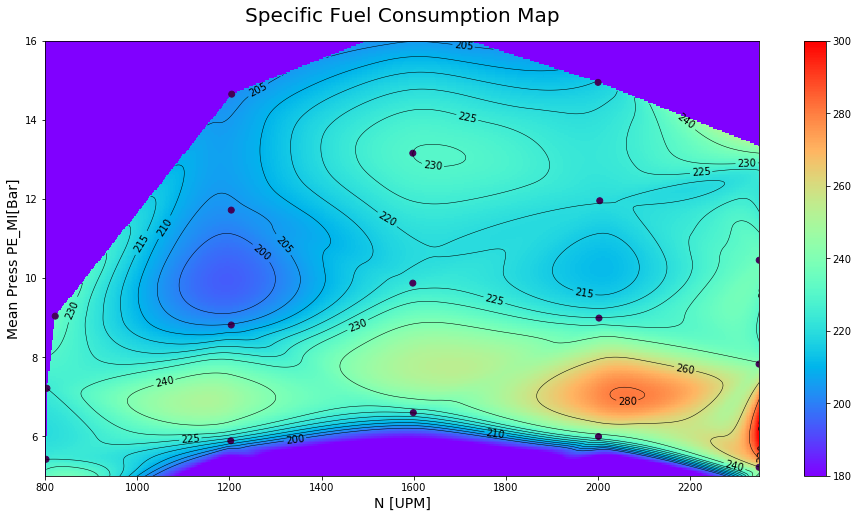

In [124]:
import numpy
import scipy
import matplotlib.pyplot
import matplotlib.mlab
#%matplotlib inline

# plot properties
matplotlib.pyplot.figure(figsize=(16, 8)) # increase plot size
matplotlib.pyplot.title('Specific Fuel Consumption Map', fontsize=20, y=1.03)
matplotlib.pyplot.xlabel('N [UPM]', fontsize=14)
matplotlib.pyplot.ylabel('Mean Press PE_MI[Bar]', fontsize=14)
matplotlib.pyplot.ylim([5,16])
matplotlib.pyplot.xlim([800,2350])
isolines = [200, 205, 210, 215, 220, 225, 230, 240, 260, 280]

# read data from CSV
f = numpy.genfromtxt('consumption.csv', dtype=float, delimiter=',', names=True) 
x = f['N']
y = f['PE_MI']
z = f['BE']

# interpolations
xi = numpy.linspace(min(x), max(x), 600)
yi = numpy.linspace(min(y), max(y), 400)
zi = scipy.interpolate.griddata((x,y), z, (xi[None,:], yi[:,None]), method='cubic', rescale=True) 

# actual plot
cmap = matplotlib.pyplot.contour(xi, yi, zi, isolines, linewidths=0.5, colors='black') # isolines
matplotlib.pyplot.clabel(cmap, fmt='%.0f') # isolines labels
matplotlib.pyplot.pcolormesh(xi, yi, zi, vmin=180, vmax=300, cmap=matplotlib.pyplot.get_cmap('rainbow')) # contour map
matplotlib.pyplot.colorbar() # legend
matplotlib.pyplot.scatter(x, y, c=z) # measurement points

